In [2]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('lung_ct_model.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

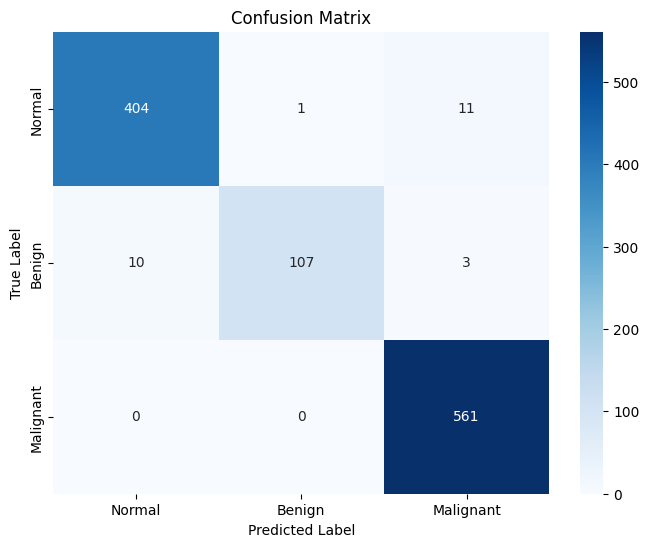

Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.97      0.97       416
      Benign       0.99      0.89      0.94       120
   Malignant       0.98      1.00      0.99       561

    accuracy                           0.98      1097
   macro avg       0.98      0.95      0.97      1097
weighted avg       0.98      0.98      0.98      1097



In [9]:
import os
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define directories for each class
data_directory = './sample_data'  # Base directory
class_dirs = {'Normal': 0, 'Benign': 1, 'Malignant': 2}  # Mapping for class labels

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Loop through each class directory
for class_name, class_label in class_dirs.items():
    class_dir_path = os.path.join(data_directory, class_name)

    # Loop through each image in the class directory
    for image_file in os.listdir(class_dir_path):
        if image_file.endswith(('.png', '.jpg', '.jpeg')):  # Only process image files
            image_path = os.path.join(class_dir_path, image_file)

            # Load and preprocess the image
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
            resized_image = cv2.resize(image, (256, 256))  # Resize to 256x256
            input_image = np.expand_dims(resized_image, axis=0)  # Add batch dimension
            input_image = np.repeat(input_image[..., np.newaxis], 3, axis=-1)  # Convert to 3 channels
            input_image = input_image / 255.0  # Normalize the image

            # Make predictions
            predictions = model.predict(input_image)[0]

            # Map the predictions to class labels
            labels = ['BENIGN', 'MALIGNANT', 'NORMAL']
            predicted_label = labels[np.argmax(predictions)]

            # Convert predicted label to numeric form (0 for Normal, 1 for Benign, 2 for Malignant)
            if predicted_label == 'NORMAL':
                predicted_labels.append(0)
            elif predicted_label == 'BENIGN':
                predicted_labels.append(1)
            elif predicted_label == 'MALIGNANT':
                predicted_labels.append(2)

            # Append the true label
            true_labels.append(class_label)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_dirs.keys(), yticklabels=class_dirs.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_dirs.keys()))
